<a href="https://colab.research.google.com/github/LimJuHyung1/DeepLearningClass/blob/main/Chap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [ ]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # 데이터 불러오기
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']
cars = pd.read_csv('car_evaluation.csv', names=cols, header=None)

Saving car_evaluation.csv to car_evaluation.csv


<Axes: ylabel='output'>

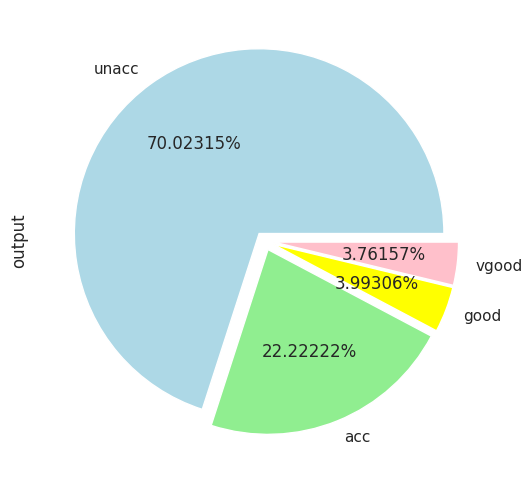

In [ ]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%',
                                colors=['lightblue', 'lightgreen', 'yellow', 'pink'],
                                explode=(0.05, 0.05, 0.05,0.05))

In [ ]:
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis=1)
y = labels.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense (Dense)               (None, 15)                330       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 534 (2.09 KB)
Trainable params: 534 (2.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
139/139 [==============================] - 2s 4ms/step - loss: 1.1632 - acc: 0.5683 - val_loss: 0.9925 - val_acc: 0.6498
Epoch 2/50
139/139 [==============================] - 0s 3ms/step - loss: 0.7603 - acc: 0.7195 - val_loss: 0.8261 - val_acc: 0.6498
Epoch 3/50
139/139 [==============================] - 0s 3ms/step - loss: 0.6143 - acc: 0.7294 - val_loss: 0.6811 - val_acc: 0.6823
Epoch 4/50
139/139 [==============================] - 0s 2ms/step - loss: 0.4884 - acc: 0.7792 - val_loss: 0.5744 - val_acc: 0.7256
Epoch 5/50
139/139 [==============================] - 0s 3ms/step - loss: 0.3983 - acc: 0.8434 - val_loss: 0.4569 - val_acc: 0.8231
Epoch 6/50
139/139 [==============================] - 0s 3ms/step - loss: 0.3261 - acc: 0.8724 - val_loss: 0.3845 - val_acc: 0.8484
Epoch 7/50
139/139 [==============================] - 0s 3ms/step - loss: 0.2763 - acc: 0.8914 - val_loss: 0.3404 - val_acc: 0.8484
Epoch 8/50
139/139 [==============================] - 0s 2ms/step - loss: 0.

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

11/11 [==============================] - 0s 4ms/step - loss: 0.0629 - acc: 0.9769
Test Score: 0.06288187950849533
Test Accuracy: 0.9768785834312439
